Dataset Head:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 colum

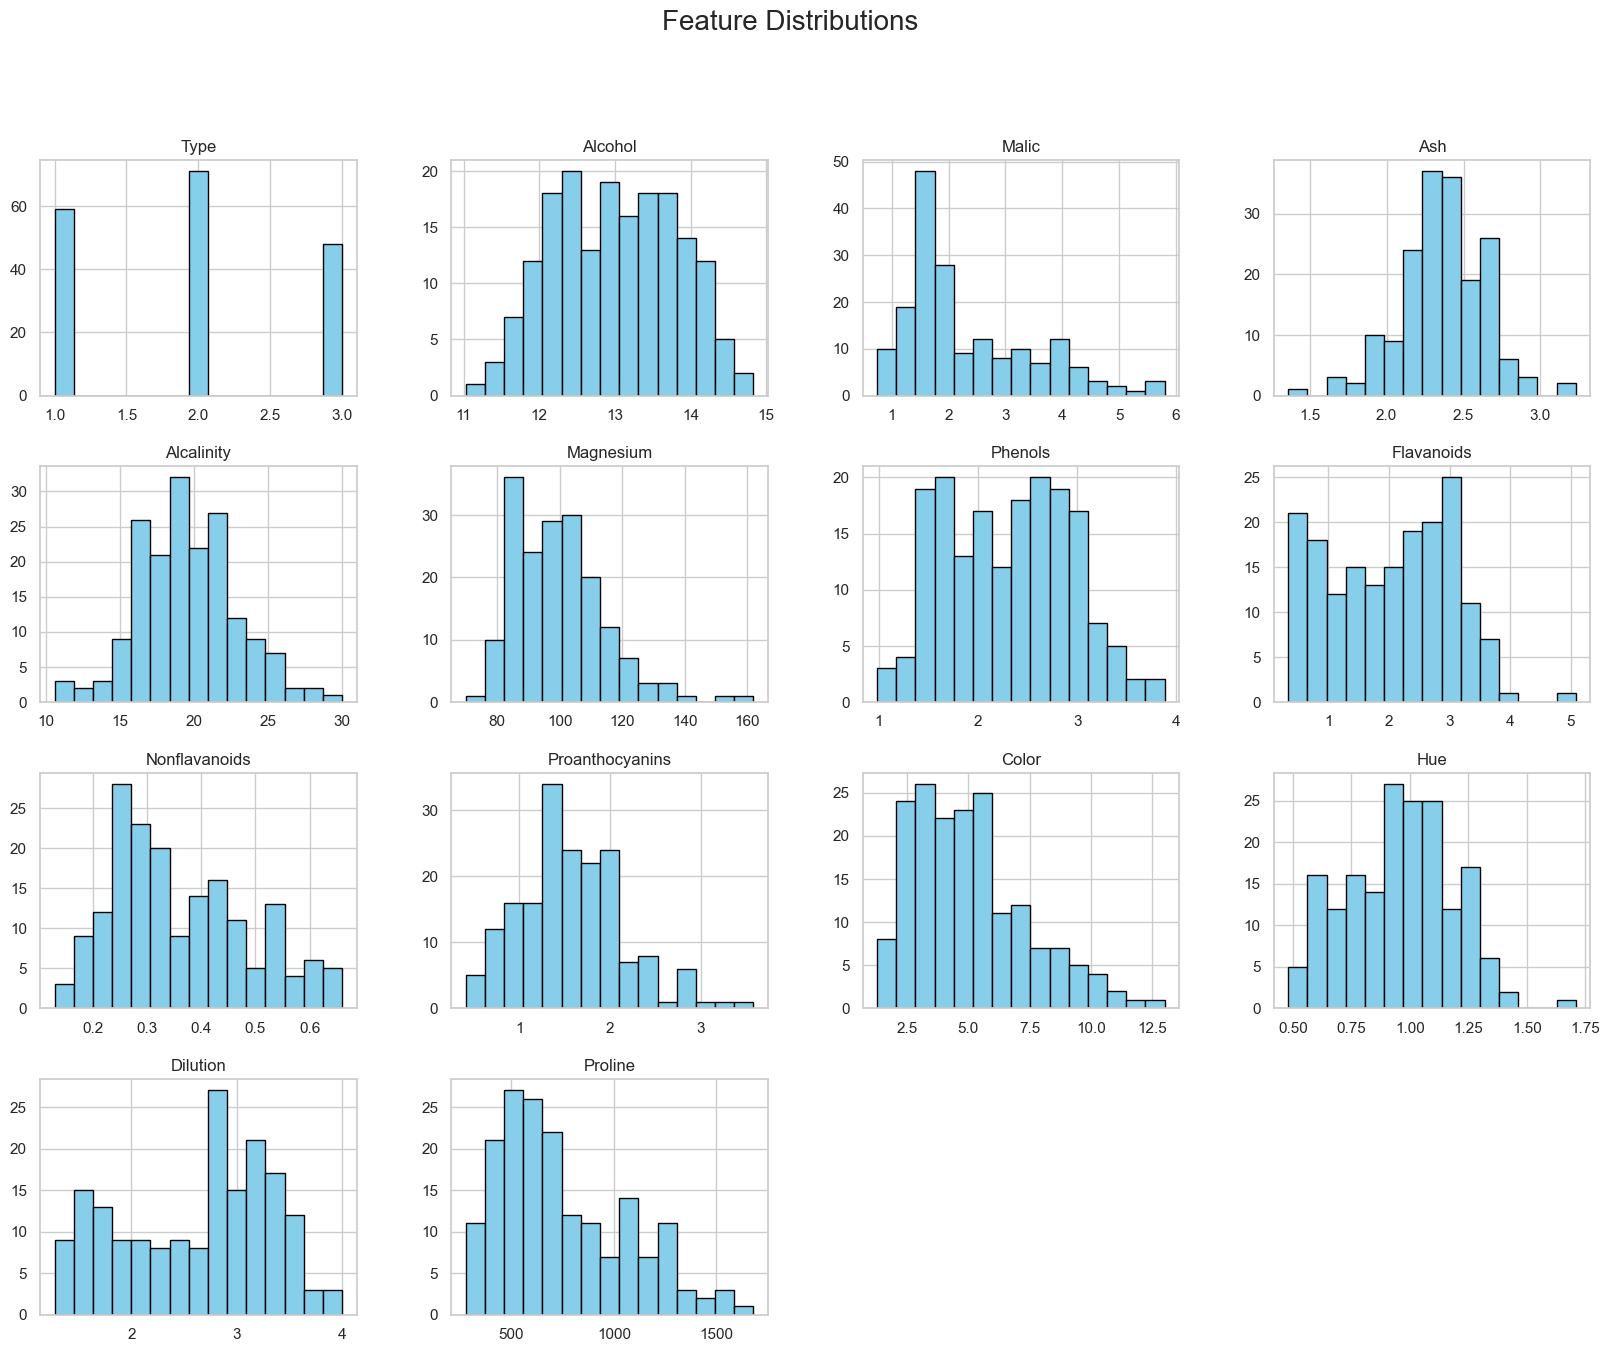


Plotting correlation heatmap...


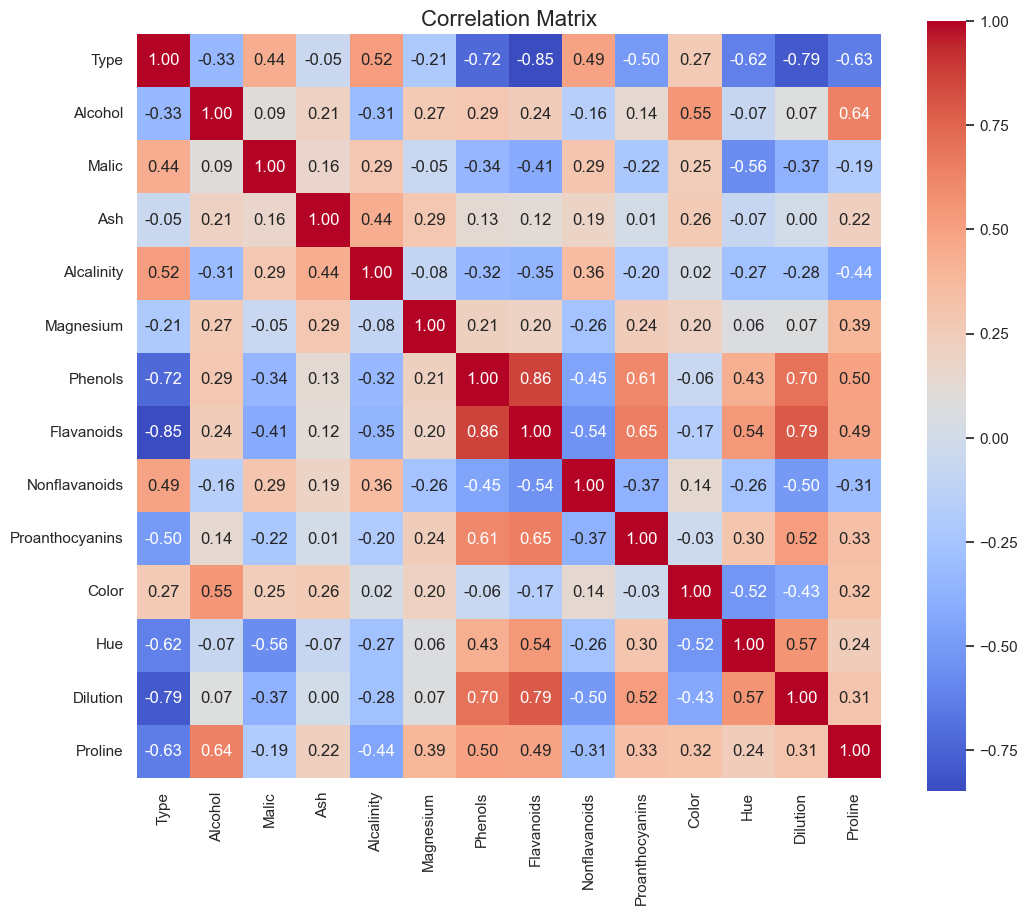


Standardizing features...

Performing PCA...

Optimal number of components to retain 95% variance: 10
Shape of PCA-transformed data: (178, 10)


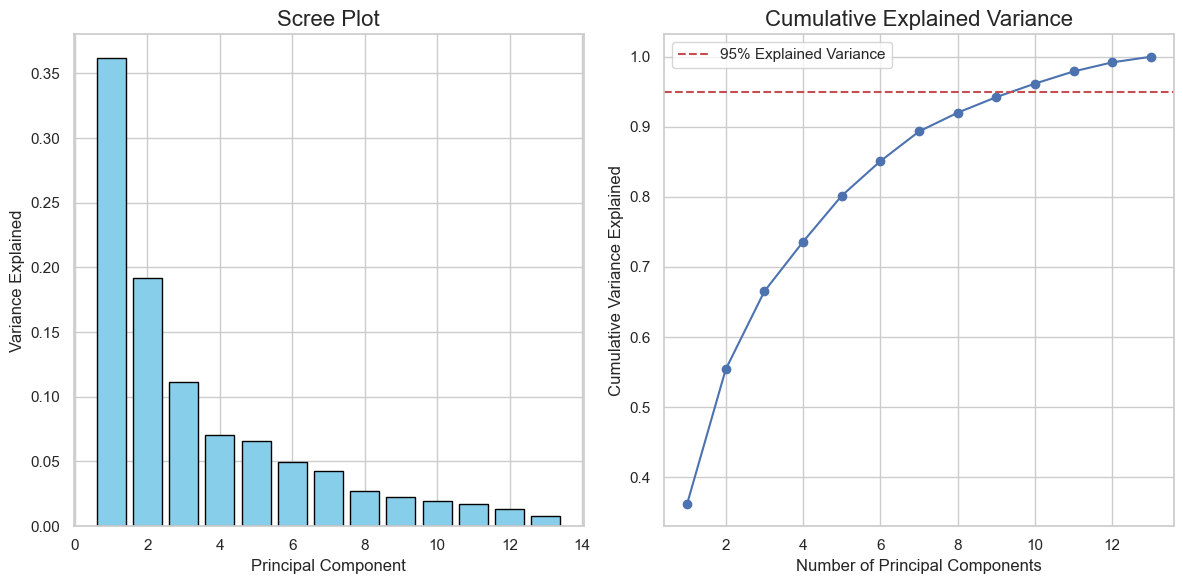

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset

file_path = r'C:\Users\User\Downloads\PCA\PCA\wine.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Step 2: Exploratory Data Analysis (EDA)

# Set a style for plots
sns.set(style="whitegrid")

# Plot histograms for numerical features
print("\nPlotting feature distributions...")
data.hist(bins=15, figsize=(20, 15), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()

# Generate a correlation heatmap
print("\nPlotting correlation heatmap...")
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# Step 3: Standardize the dataset (excluding the target column 'Type')
print("\nStandardizing features...")
features = data.drop(columns=['Type'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Perform PCA
print("\nPerforming PCA...")
pca = PCA()
pca.fit(scaled_features)
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Determine the number of components for 95% explained variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1

# Transform the data using the optimal number of components
pca = PCA(n_components=optimal_components)
pca_transformed = pca.fit_transform(scaled_features)

# Output results
print(f"\nOptimal number of components to retain 95% variance: {optimal_components}")
print(f"Shape of PCA-transformed data: {pca_transformed.shape}")

# Step 5: Visualization of PCA Results

# Scree Plot
plt.figure(figsize=(12, 6))

# Scree Plot
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color="skyblue", edgecolor="black")
plt.title("Scree Plot", fontsize=16)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")

# Cumulative Explained Variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o", color="b")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Explained Variance")
plt.title("Cumulative Explained Variance", fontsize=16)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.legend()

plt.tight_layout()
plt.show()
